In [1]:
import sklearn
import sklearn.decomposition as decomposition
import sklearn.neighbors as neighbors
import sklearn.manifold as manifold
decomposition.__all__,neighbors.__all__,manifold.__all__

(['DictionaryLearning',
  'FastICA',
  'IncrementalPCA',
  'KernelPCA',
  'MiniBatchDictionaryLearning',
  'MiniBatchSparsePCA',
  'NMF',
  'PCA',
  'SparseCoder',
  'SparsePCA',
  'dict_learning',
  'dict_learning_online',
  'fastica',
  'non_negative_factorization',
  'randomized_svd',
  'sparse_encode',
  'FactorAnalysis',
  'TruncatedSVD',
  'LatentDirichletAllocation'],
 ['BallTree',
  'DistanceMetric',
  'KDTree',
  'KNeighborsClassifier',
  'KNeighborsRegressor',
  'KNeighborsTransformer',
  'NearestCentroid',
  'NearestNeighbors',
  'RadiusNeighborsClassifier',
  'RadiusNeighborsRegressor',
  'RadiusNeighborsTransformer',
  'kneighbors_graph',
  'radius_neighbors_graph',
  'KernelDensity',
  'LocalOutlierFactor',
  'NeighborhoodComponentsAnalysis',
  'VALID_METRICS',
  'VALID_METRICS_SPARSE'],
 ['locally_linear_embedding',
  'LocallyLinearEmbedding',
  'Isomap',
  'MDS',
  'smacof',
  'SpectralEmbedding',
  'spectral_embedding',
  'TSNE',
  'trustworthiness'])

In [2]:
import pandas as pd
xigua40 = pd.read_csv('xigua4.0.csv',index_col=0)
xigua40_x = xigua40[['密度','含糖率']].values
xigua40_y = xigua40[['好瓜']].values.flatten()
xy = sklearn.model_selection.train_test_split(xigua40_x,xigua40_y,random_state=1234)
xy

[array([[0.36 , 0.37 ],
        [0.657, 0.198],
        [0.483, 0.312],
        [0.525, 0.369],
        [0.697, 0.46 ],
        [0.634, 0.264],
        [0.473, 0.376],
        [0.532, 0.472],
        [0.339, 0.241],
        [0.403, 0.237],
        [0.719, 0.103],
        [0.751, 0.489],
        [0.343, 0.099],
        [0.243, 0.267],
        [0.359, 0.188],
        [0.446, 0.459],
        [0.748, 0.232],
        [0.639, 0.161],
        [0.714, 0.346],
        [0.481, 0.149],
        [0.282, 0.257],
        [0.593, 0.042]]),
 array([[0.437, 0.211],
        [0.245, 0.057],
        [0.556, 0.215],
        [0.774, 0.376],
        [0.725, 0.445],
        [0.666, 0.091],
        [0.608, 0.318],
        [0.478, 0.437]]),
 array([-1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
        -1,  1,  1, -1, -1], dtype=int64),
 array([ 1, -1,  1,  1,  1, -1,  1,  1], dtype=int64)]

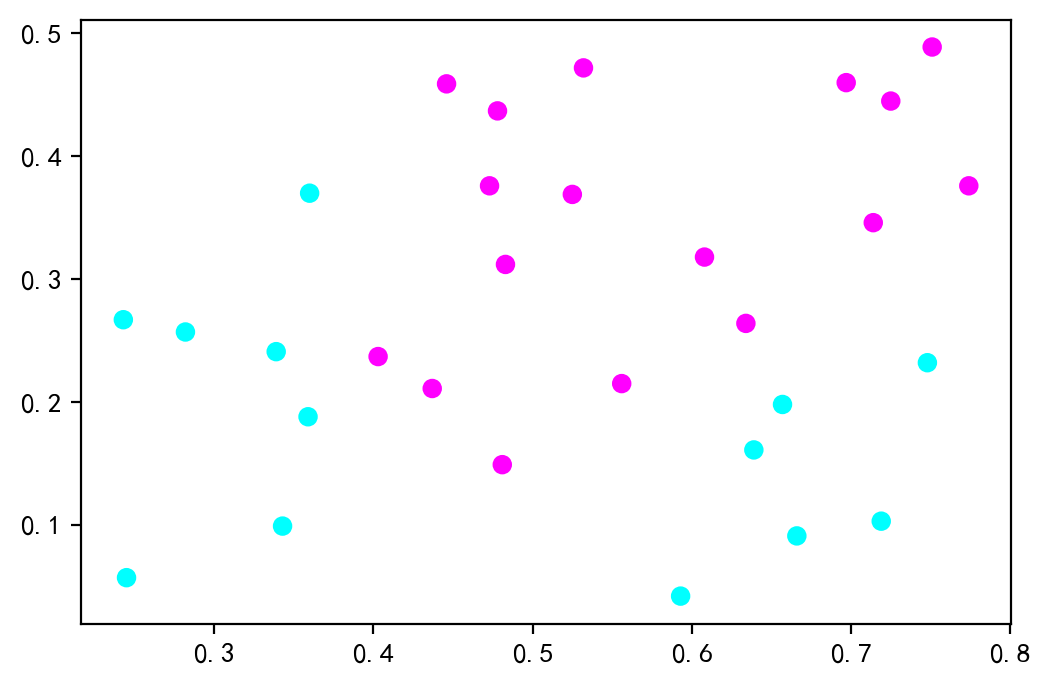

In [3]:
import  matplotlib
import  matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.dpi']=200
matplotlib.rcParams['font.sans-serif']=['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False
import numpy as np
xigua40_x_np = np.array(xigua40_x)
plt.scatter(xigua40_x_np[:,0],xigua40_x_np[:,1],c=xigua40_y,cmap='cool')
plt.show()

In [10]:
def show_knn(n_neighbors):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(xy[0],xy[2])
    print(n_neighbors, knn.score(xy[0],xy[2]),knn.score(xy[1],xy[3]))

for nei in range(1,10):
    show_knn(nei)

1 1.0 1.0
2 0.9090909090909091 0.875
3 0.8636363636363636 1.0
4 0.8636363636363636 0.75
5 0.8636363636363636 1.0
6 0.8636363636363636 0.875
7 0.8636363636363636 0.875
8 0.8636363636363636 0.875
9 0.8636363636363636 0.875


In [11]:
from sklearn import datasets
boston = datasets.load_boston()
len(boston)

5

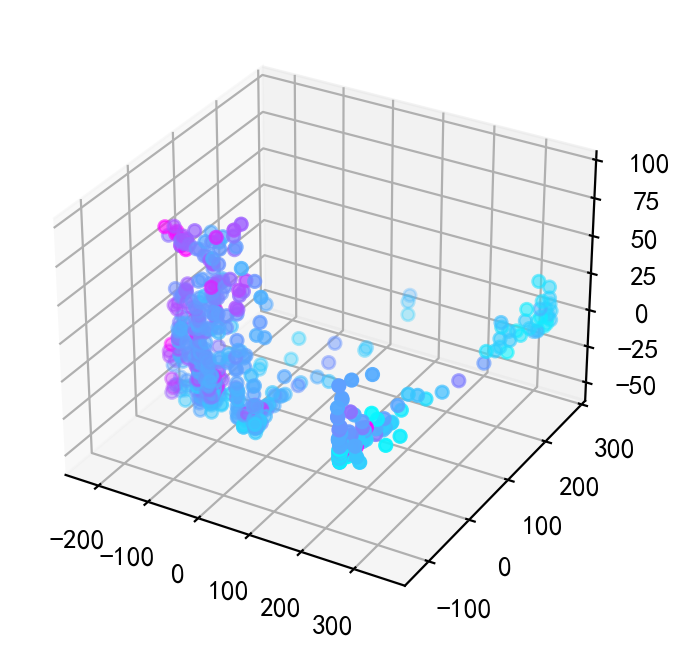

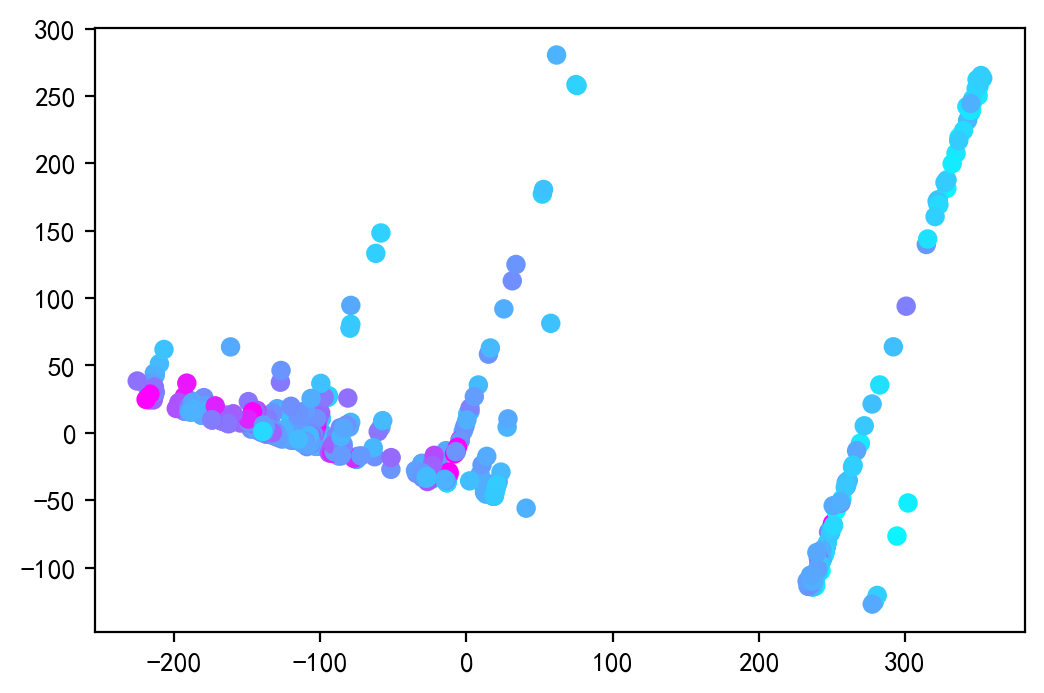

In [15]:
pca = decomposition.PCA(n_components=3)
boston_pca = pca.fit_transform(boston.data)
axes = plt.axes(projection='3d')
axes.scatter(boston_pca[:,0],boston_pca[:,1],boston_pca[:,2], c=boston.target, cmap='cool')
plt.show()
pca = decomposition.PCA(n_components=2)
boston_pca = pca.fit_transform(boston.data)
axes = plt.axes()
axes.scatter(boston_pca[:,0],boston_pca[:,1], c=boston.target, cmap='cool')
plt.show()

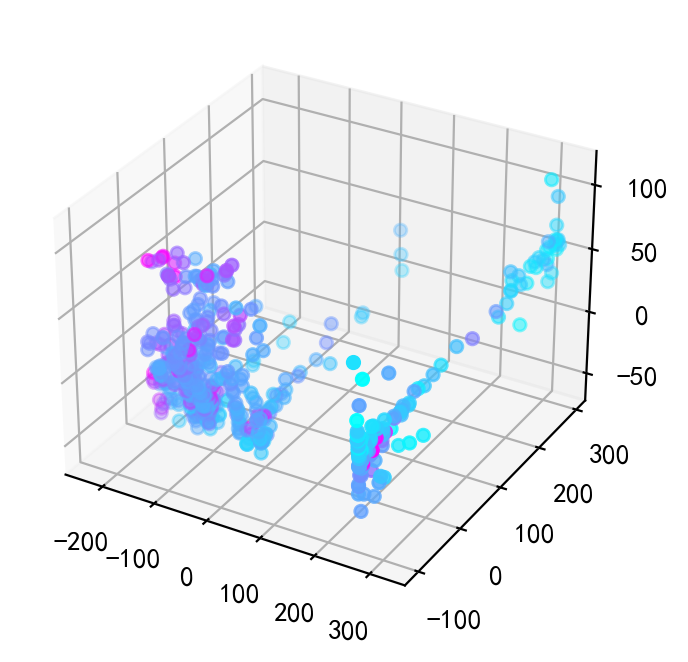

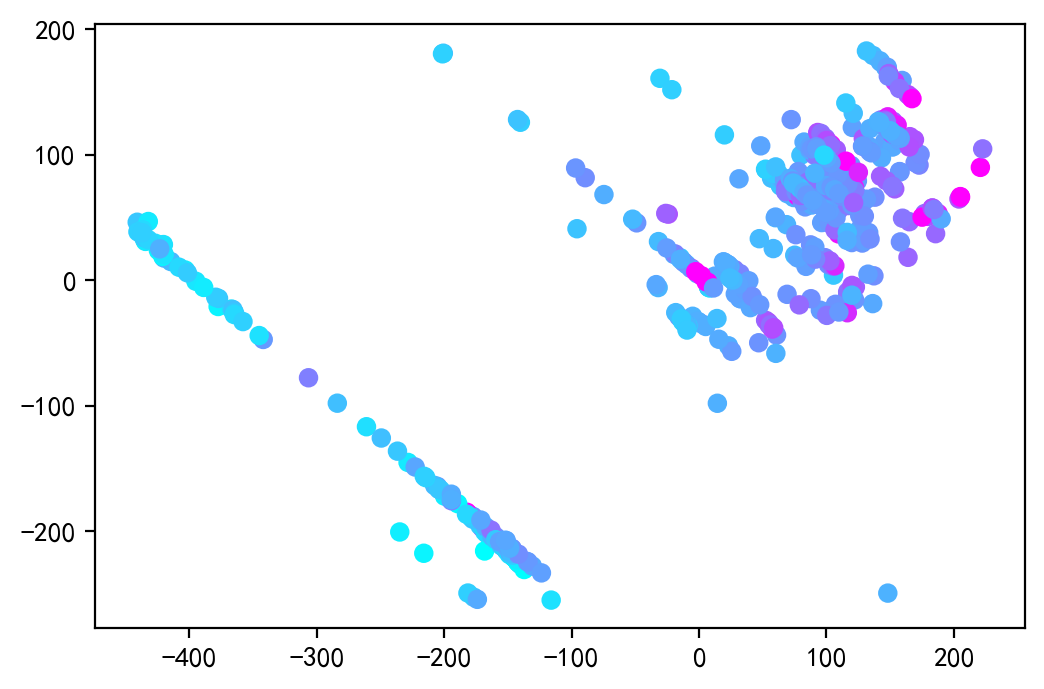

In [16]:
mds = manifold.MDS(n_components=3)
boston_data = mds.fit_transform(boston.data)
axes = plt.axes(projection='3d')
axes.scatter(boston_data[:,0],boston_data[:,1],boston_data[:,2], c=boston.target, cmap='cool')
plt.show()
mds = manifold.MDS(n_components=2)
boston_data = mds.fit_transform(boston.data)
axes = plt.axes()
axes.scatter(boston_data[:,0],boston_data[:,1], c=boston.target, cmap='cool')
plt.show()

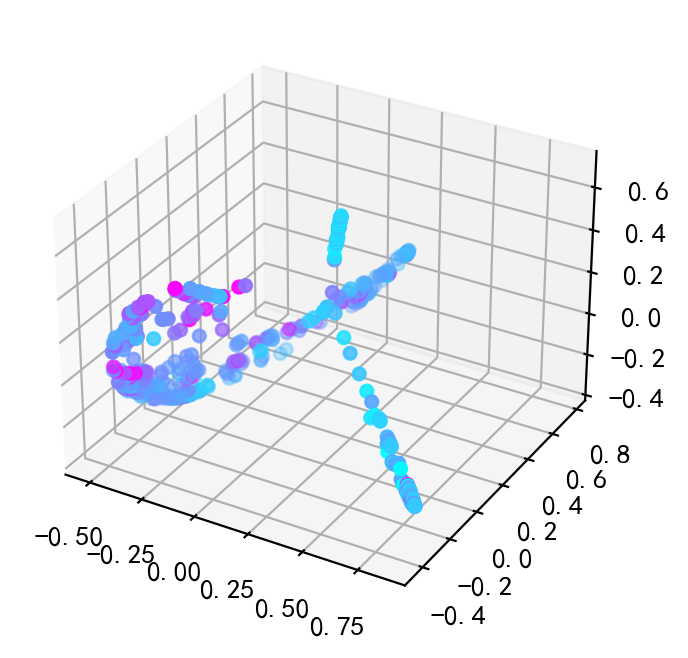

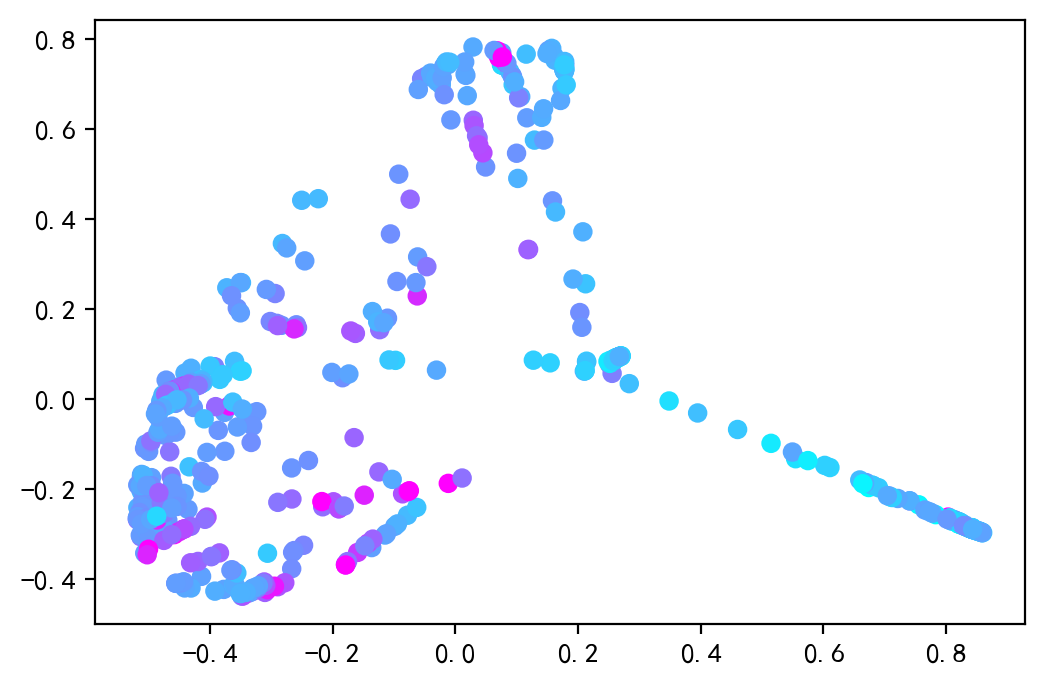

In [20]:
kpca = decomposition.KernelPCA(n_components=3,kernel='rbf',gamma=0.0001)
boston_data = kpca.fit_transform(boston.data)
axes = plt.axes(projection='3d')
axes.scatter(boston_data[:,0],boston_data[:,1],boston_data[:,2], c=boston.target, cmap='cool')
plt.show()
kpca = decomposition.KernelPCA(n_components=2,kernel='rbf',gamma=0.0001)
boston_data = kpca.fit_transform(boston.data)
axes = plt.axes()
axes.scatter(boston_data[:,0],boston_data[:,1], c=boston.target, cmap='cool')
plt.show()


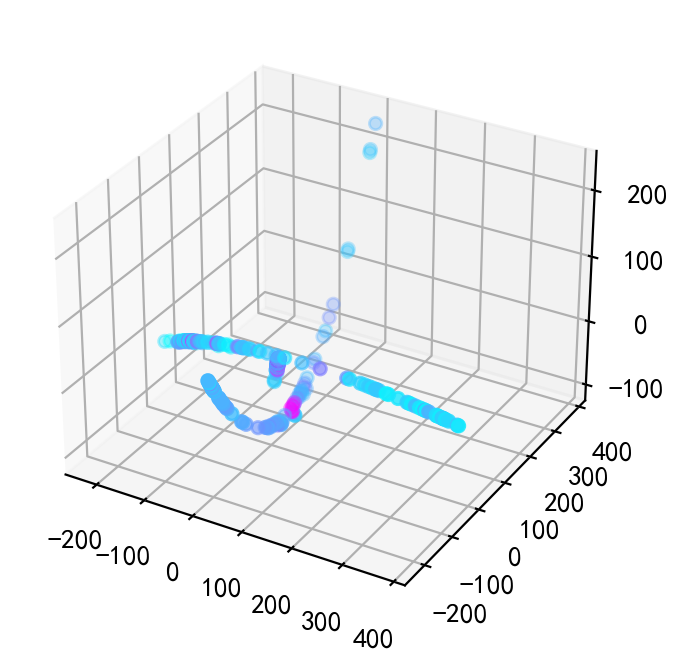

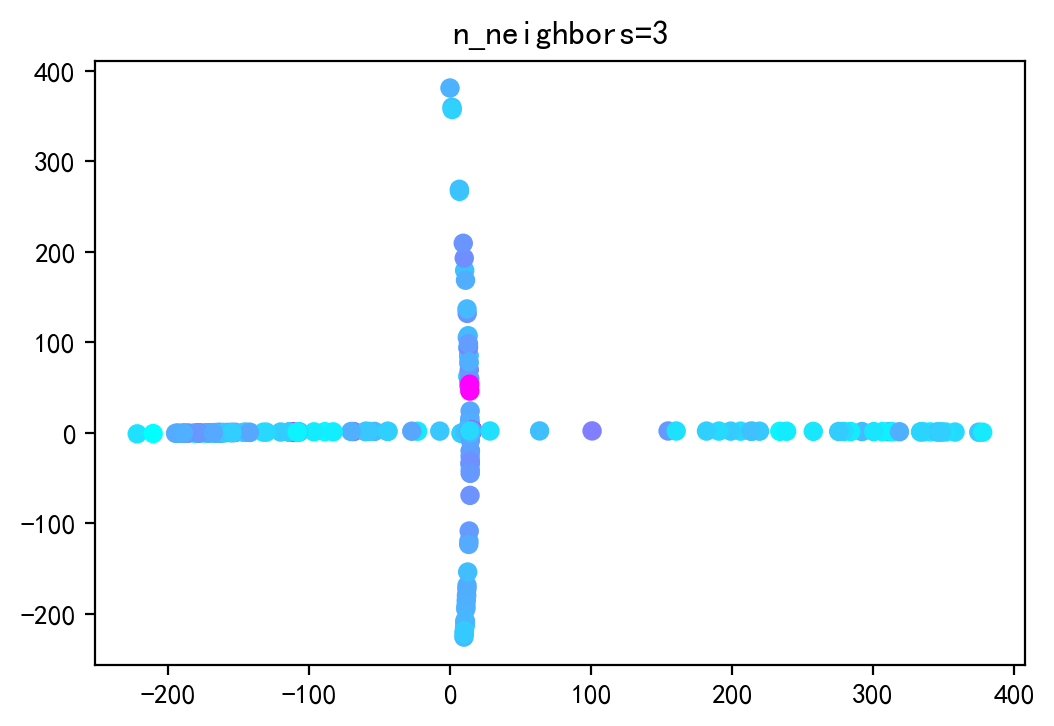

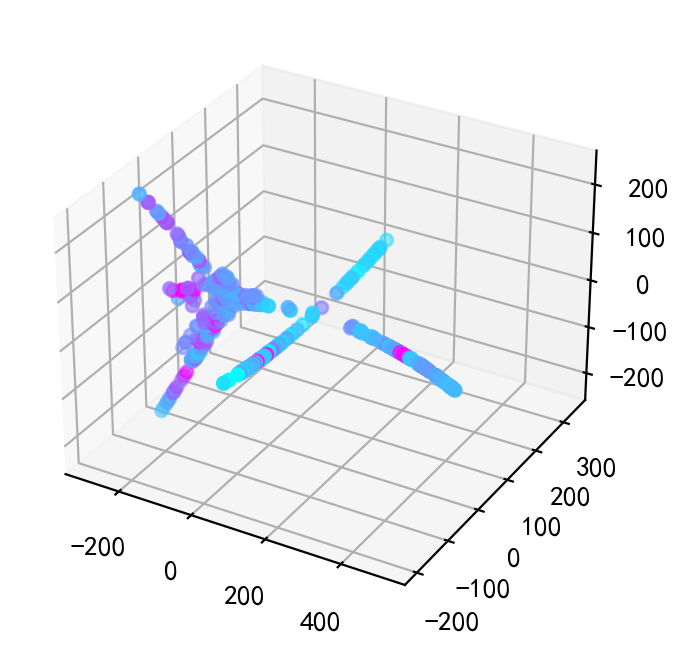

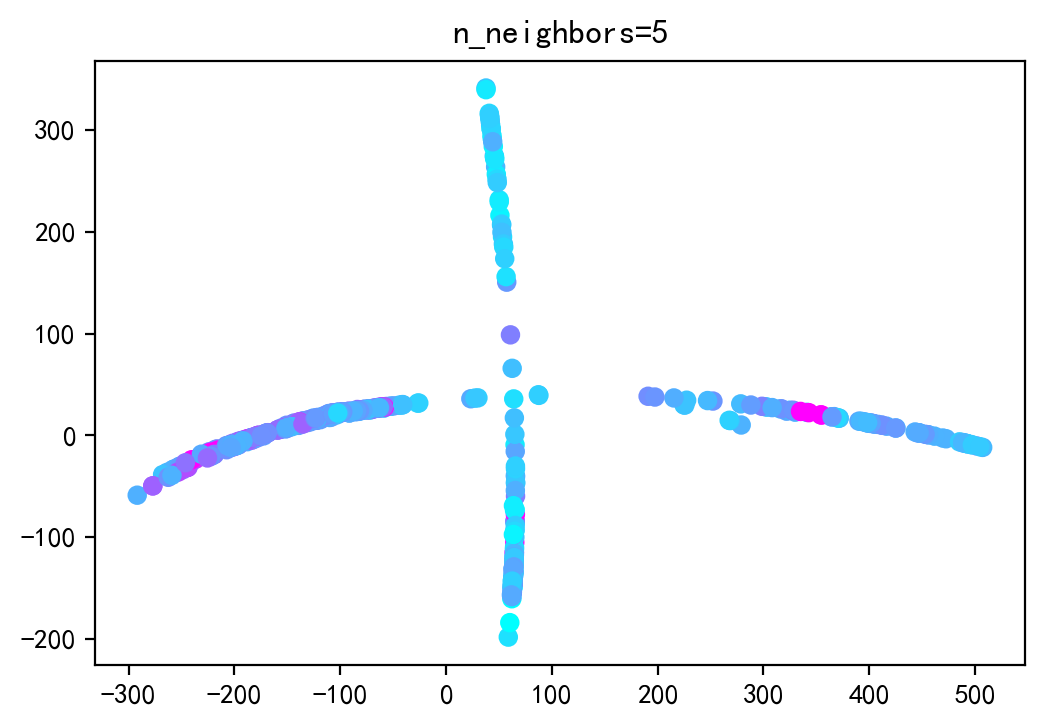

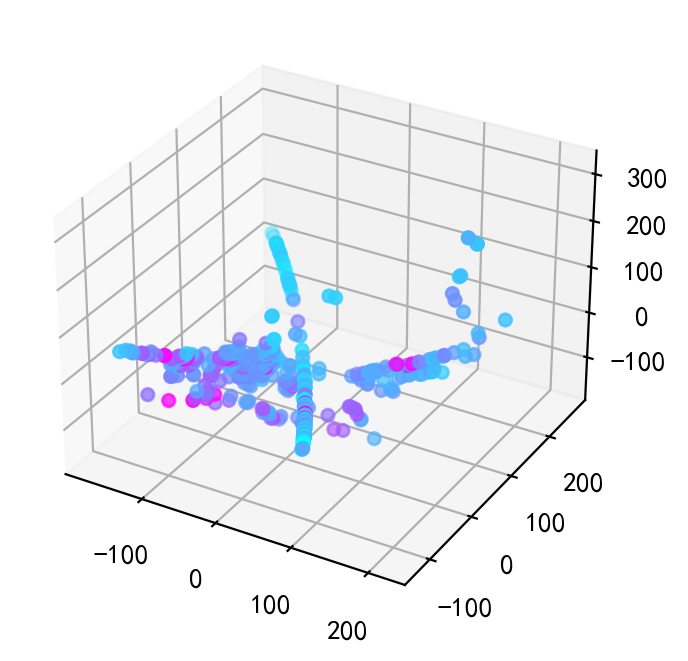

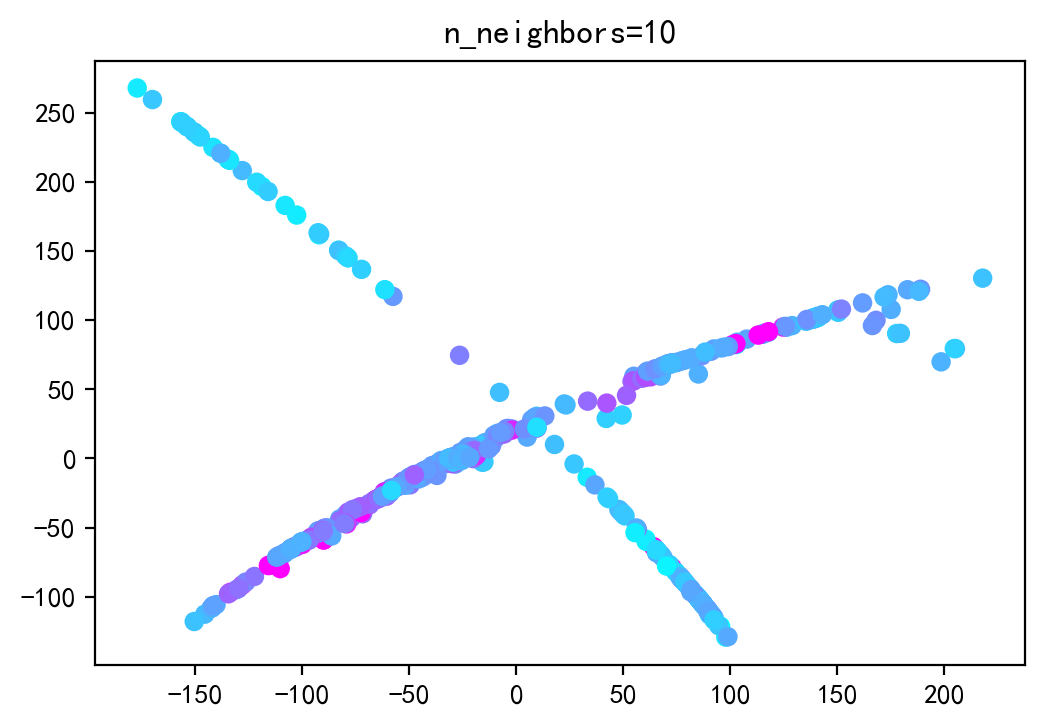

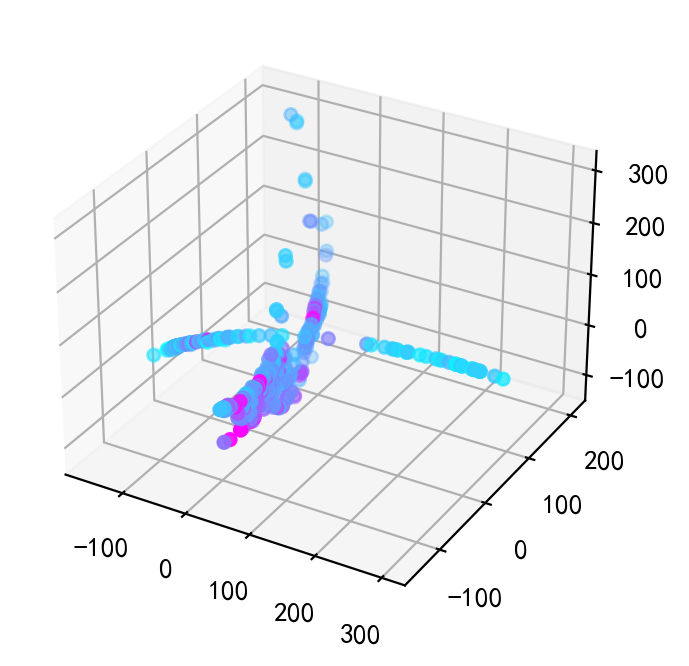

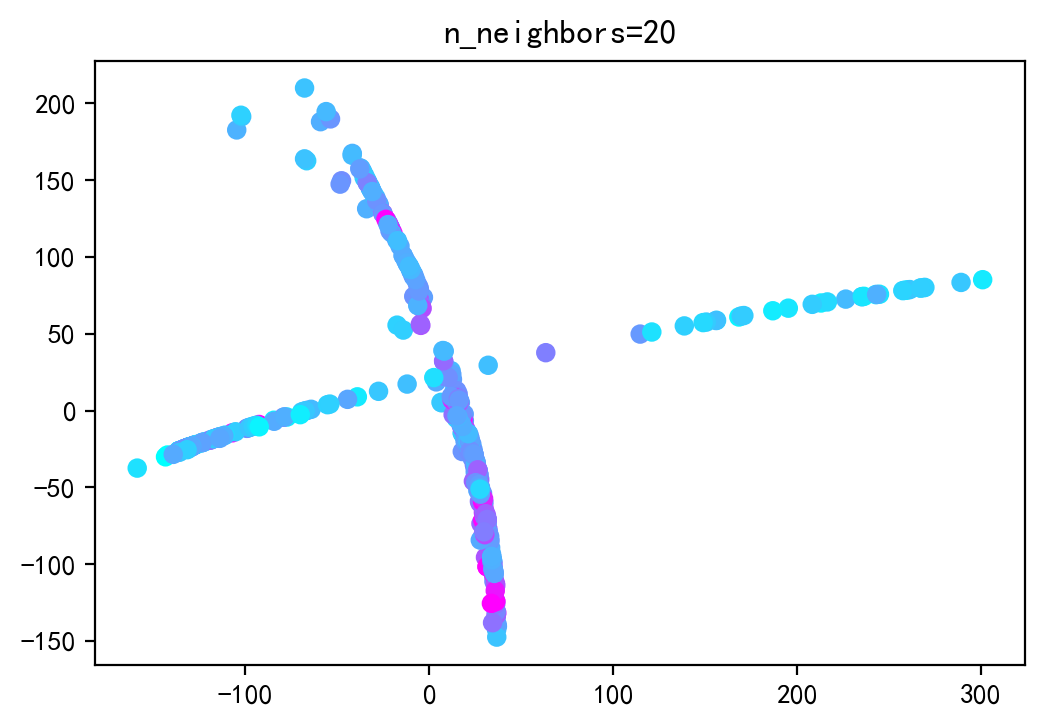

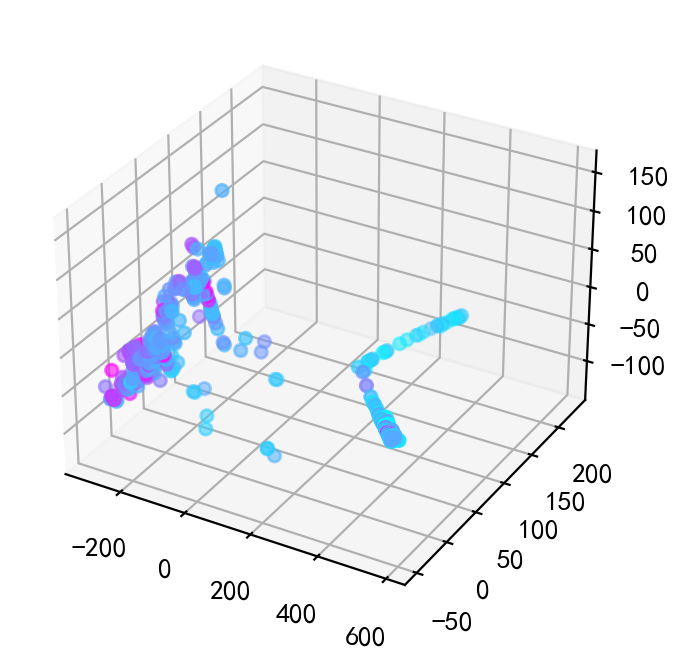

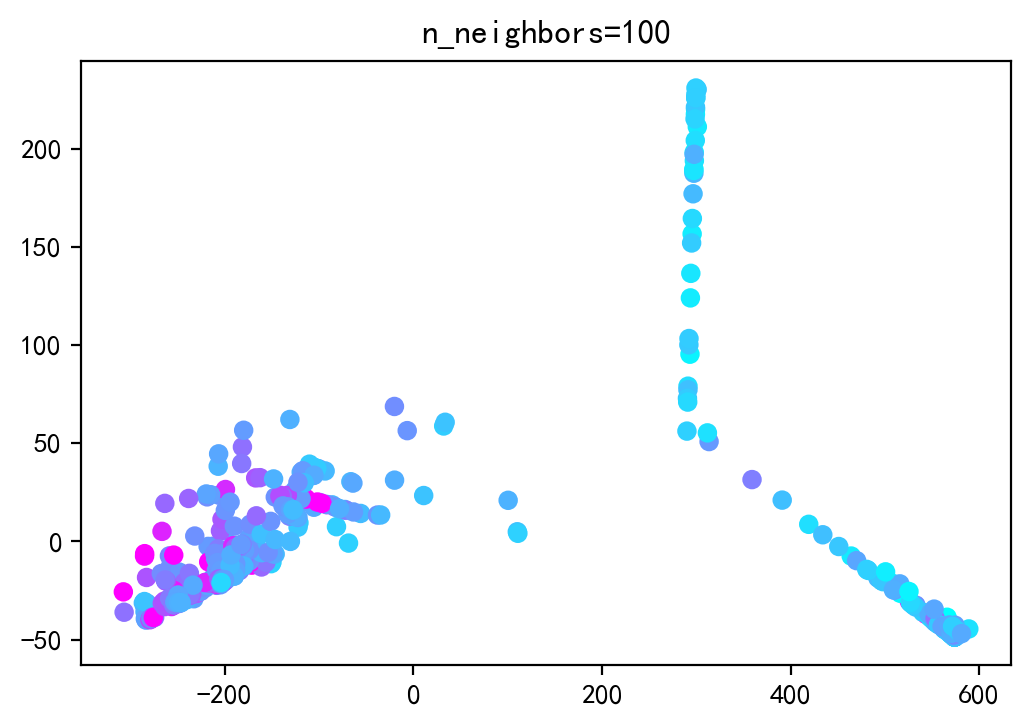

In [24]:
def show_isomap(n_neighbors):
    isomap = manifold.Isomap(n_components=3,n_neighbors=n_neighbors)
    boston_data = isomap.fit_transform(boston.data)
    axes = plt.axes(projection='3d')
    axes.scatter(boston_data[:,0],boston_data[:,1],boston_data[:,2], c=boston.target, cmap='cool')
    plt.show()
    isomap = manifold.Isomap(n_components=2,n_neighbors=n_neighbors)
    boston_data = isomap.fit_transform(boston.data)
    axes = plt.axes()
    axes.scatter(boston_data[:,0],boston_data[:,1], c=boston.target, cmap='cool')
    plt.title("n_neighbors="+str(n_neighbors))
    plt.show()

show_isomap(3)
show_isomap(5)
show_isomap(10)
show_isomap(20)
show_isomap(100)

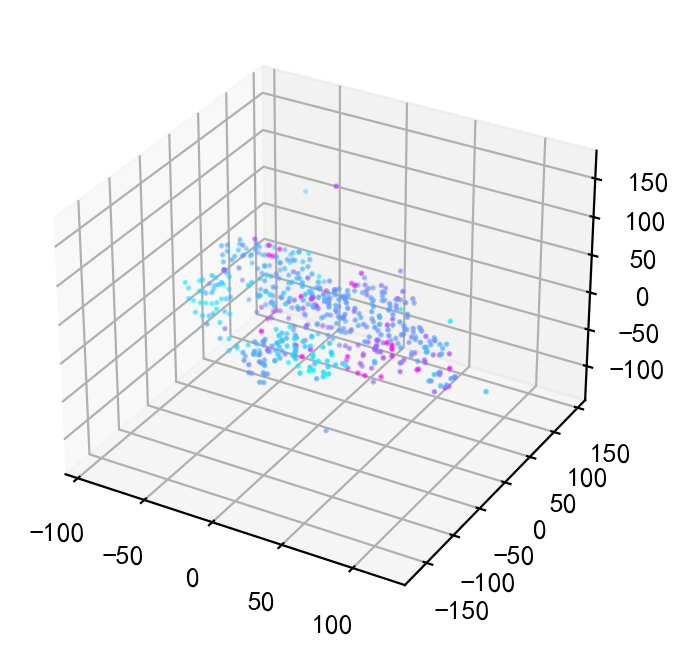

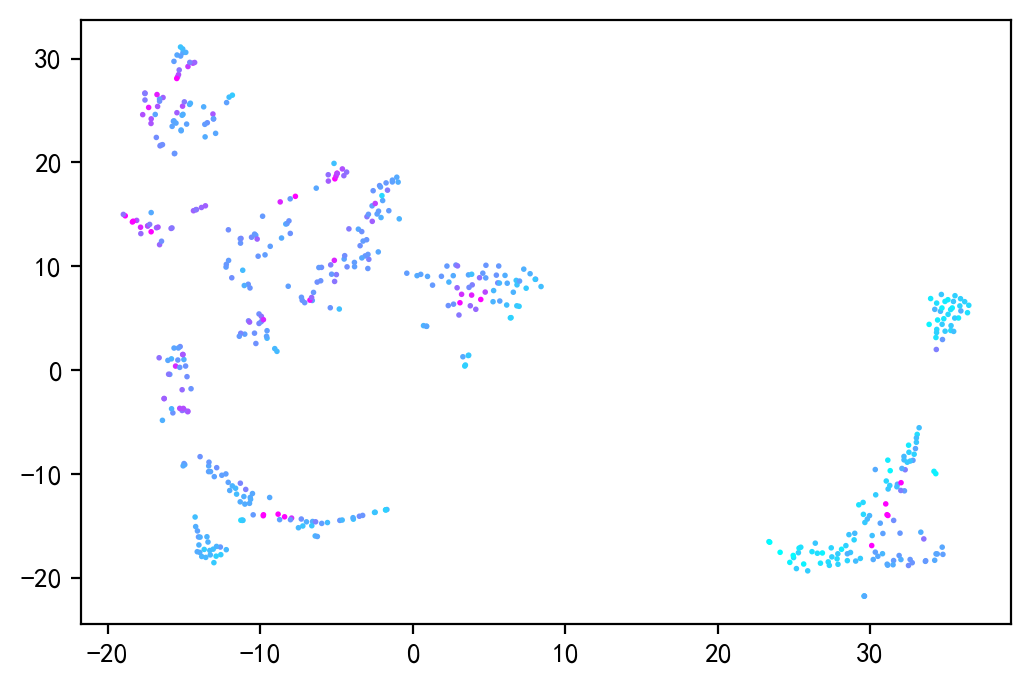

In [26]:
tsne = manifold.TSNE(n_components=3)
boston_data = tsne.fit_transform(boston.data)
axes = plt.axes(projection='3d')
axes.scatter(boston_data[:,0],boston_data[:,1],boston_data[:,2], c=boston.target, cmap='cool',s=1)
plt.show()
tsne = manifold.TSNE(n_components=2)
boston_data = tsne.fit_transform(boston.data)
axes = plt.axes()
axes.scatter(boston_data[:,0],boston_data[:,1], c=boston.target, cmap='cool',s=1)
plt.show()